# Лабораторная работа №2

## Предельные циклы. Теория индексов.

<span style="font-style:normal; font-size:12pt;"> 
    <p>   С помощью критерия Бенедиксона и теории индекса обсудить возможность возникновения предельных циклов в следующих динамических системах. </p> 
 
    
$$
\begin{cases}
\dot{x} = a - y - bx + xy^{2}, \ \ \ (1) \\
\dot{y} = bx - xy \\
\end{cases}
$$



In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
from matplotlib.collections import PatchCollection
from matplotlib import cm
from matplotlib.colors import ListedColormap
import numpy as np

### Ход работы

#### 1. Воспользуемся критерием Бенедиксона для определения зон, в которых не могут существовать замкнутые траектории:

> <span style="font-style:normal; font-size:12pt;"> 
$$
    \begin{equation}
        f(x, y) = a - y - bx + xy^{2}, \\
        g(x, y) = bx - xy \\
    \end{equation}
$$
    <p></p>
$$
    \begin{equation}
        \frac{\partial{f}}{\partial{x}} = -b + y^{2}, \\
        \frac{\partial{g}}{\partial{y}} = -x \\
    \end{equation}
$$
    <p></p>
$$
    \begin{equation}
        \frac{\partial{f}}{\partial{x}} + \frac{\partial{g}}{\partial{y}} = y^{2} -x -b  \\
    \end{equation}
$$
    <p></p>
$$
    \begin{equation}
        y^{2} -x -b = 0, \\
        y^{2} = x + b \\  \\
    \end{equation}
$$
    <p>
        Граница областей - парабола со смещением вдоль оси x
    </p>
</span>

#### 2. Найдем стационарные точки и определим их тип.

><span style="font-style:normal; font-size:12pt;"> 
    <p>
        Стационарные точки можно найти аналитически, приравняв правые части системы к нулю и решив относительно двух неизвестных x и y:
    </p>
    <p></p>
$$
    \left[ 
        \begin{gathered} 
            \begin{cases}
                x = 0 \\
                y = a \\
            \end{cases} \\
            \begin{cases}
                x = \frac{b-a}{b(b-1)} \\
                y = b \\
            \end{cases}
        \end{gathered} 
    \right.
$$
    <p></p>
    <p>
        a и b - параметры. Примем для определенности a = 1, b = 5
    </p>
</span>

In [2]:
a = 1
b = 5

In [3]:
x1 = 0
y1 = 1

x2 = 1 / 5
y2 = 5

In [4]:
y_plot = np.linspace(-5, 5, 100)
x_plot = [y**2 - b for y in y_plot]

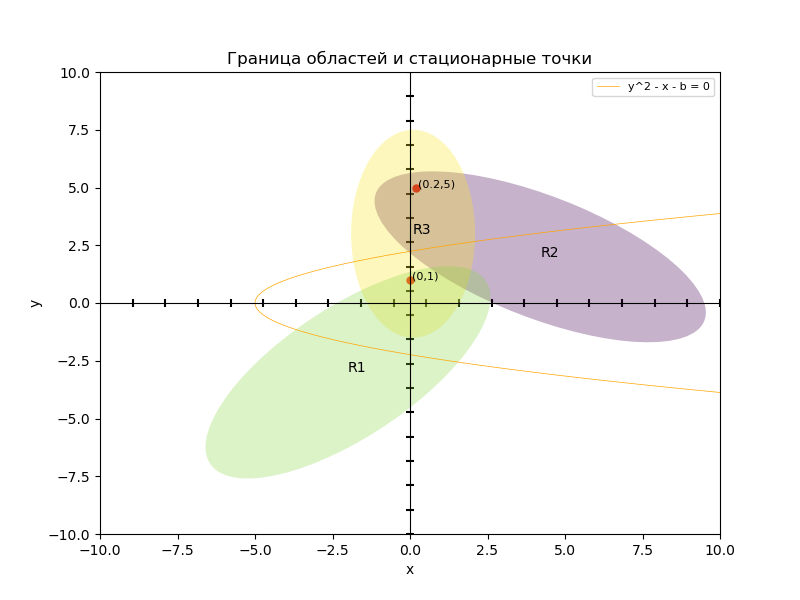

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_plot, y_plot, color="orange", linewidth=0.5, label="y^2 - x - b = 0")
plt.axvline(x=0, linewidth=0.8, color="black")
plt.axhline(y=0, linewidth=0.8, color="black")

ax.scatter(np.linspace(-10, 10, 20), np.zeros(20), color="black", marker='|')
ax.scatter(np.zeros(20), np.linspace(-10, 10, 20), color="black", marker='_')

ax.scatter(x1, y1, color="red", linewidth=0.01)
ax.scatter(x2, y2, color="red", linewidth=0.01)

plt.text(x1 + 0.07, y1, "({0},{1})".format(x1, y1), fontsize = 8)
plt.text(x2 + 0.07, y2, "({0},{1})".format(x2, y2), fontsize = 8)



patches = []

ellipse1 = Ellipse((x2 + 4, y2 - 3), width=12, height=5, angle=-30)
ellipse2 = Ellipse(((x1 + x2) / 2, (y1 + y2) / 2), width=(x1 + x2) * 20, height=(y1 + y2) * 1.5)
ellipse3 = Ellipse((x1 - 2, y1 - 4), width=12, height=5, angle=45)

patches.append(ellipse1)
patches.append(ellipse2)
patches.append(ellipse3)
                          
colors = 100 * np.random.rand(len(patches))

p = PatchCollection(patches, alpha=0.3)
p.set_array(colors)
ax.add_collection(p)

plt.text(x1 - 2, y1 - 4, "R1")
plt.text(x2 + 4, y2 - 3, "R2")
plt.text((x1 + x2) / 2, (y1 + y2) / 2, "R3")


                          
plt.xlim(-10, 10)
plt.ylim(-10, 10)

ax.set_xlabel("x")
ax.set_ylabel("y")

plt.title("Граница областей и стационарные точки")
plt.legend(fontsize=8)
plt.show()

><span style="font-style:normal; font-size:12pt;"> 
    <p>
        Система (1) нелинейная. Для исследования устойчивости стационарных точек используем теорему Ляпунова об устойчивости по первому приближению.
    </p>
</span>    

><span style="font-weight: bold; font-size:11pt;"> 
    <p>
        Линеаризация системы:
    </p>
    <p></p>
</span>
    <span style="font-weight: normal; font-size:12pt;"> 
$
    a) \ \ x = 0, \ y = 1:
$
$$
    \begin{cases}
        x = x_{1}  \\
        y = y_{1} + 1
    \end{cases}
$$
    <p>
        Получим:
    </p>
$$
    \begin{cases}
        \dot{x_{1}} = -4x_{1} - y_{1} + o(x_{1}y_{1}) \\
        \dot{y_{1}} = 4x_{1} + o(x_{1}y_{1})
    \end{cases}
$$   
    <p></p>
    <p>
        Собственные значения (один собственный вектор):
    </p>
$$
    \lambda_{1,2} = -2 
$$
    <p></p>
    <p>
        <span style="font-weight: bold; font-size:11pt;"> 
            Вывод: вырожденный узел, асимптотически устойчивый, индекс равен 1
        </span>
    </p>
    </span> 
    <p></p>
    <span style="font-weight: normal; font-size:11pt;"> 
$
    b) \ \ x = \frac{1}{5}, \ y = 5:
$
$$
    \begin{cases}
        x = x_{1} + \frac{1}{5}  \\
        y = y_{1} + 5
    \end{cases}
$$
    <p>
        Получим:
    </p>
$$
    \begin{cases}
        \dot{x_{1}} = 20x_{1} + y_{1} + o(x_{1}y_{1} + y_{1}^{2}) \\
        \dot{y_{1}} = - \frac{1}{5}y_{1} + o(x_{1}y_{1})
    \end{cases}
$$   
    <p></p>
    <p>
        Собственные значения (один собственный вектор):
    </p>
$$
    \lambda_{1} = 20  \\
    \lambda_{2} = -0.2 
$$
    <p></p>
    <p>
        <span style="font-weight: bold; font-size:11pt;"> 
            Вывод: седло, неустойчивое, индекс равен -1
        </span>
    </p>
    </span> 

#### 3. Области предельных циклов

<span style="font-style:normal; font-size:12pt;"> 
    <ol>
        <li> По критерию Бенедиксона в областях, разделяемой кривой, нет замкнутый траекторий; </li>
        <li> В области R1 может быть замкнутая траектория, так как индекс стационарной точки (0,1) равен 1, то есть векторное поле сделает один полный оборот при обхождении замкнутой кривой по часовой стрелке в окрестности этой точки; </li>
        <li> В области R2 может быть замкнутая траектория, так как индекс стационарной точки (1/5,5) равен -1, то есть векторное поле сделает один полный оборот при обхождении замкнутой кривой по часовой стрелке в окрестности этой точки; </li>
        <li> В области R3 не может быть замкнутой траектории, так как индекс стационарных точек (0,1) и (1/5,5) суммарно равен 0; </li>
    </ol>
</span>    

#### Построение графиков

In [6]:
def f1(x, y, a, b):
    return a - y - b * x + x * y**2    
    
def f2(x, y, a, b):
    return b * x - x * y

In [7]:
# Построим координатную сетку фазовой плоскости

#границы
a1 = -10
b1 = 10

a2 = -10
b2 = 15

# шаг
step = 1.5

x0_plot = np.linspace(a1, b1, round((b1 - a1) / step) + 1)
y0_plot = np.linspace(a2, b2, round((b2 - a2) / step) + 1)

In [8]:
X, Y = np.meshgrid(x0_plot, y0_plot)

In [9]:
U = f1(X, Y, a, b)
V = f2(X, Y, a, b)

In [10]:
# fig, ax = plt.subplots(figsize=(8, 6))

# # props = dict(facecolor='tomato', alpha=0.3)

# M = np.hypot(U, V)
    
# q = ax.quiver(X, Y, U, V, M, units='width')
# ax.quiverkey(q, X=0, Y=0, U=0, label="")

# ax.plot(x_plot, y_plot, color="orange", linewidth=0.5, label="y^2 - x - b = 0")
# ax.scatter([x1], [y1], color="red", linewidth=1)
# ax.scatter([x2], [y2], color="red", linewidth=1)

# plt.text(x1 + 0.07, y1, "({0},{1})".format(x1, y1), fontsize = 8)
# plt.text(x2 + 0.07, y2, "({0},{1})".format(x2, y2), fontsize = 8)

# plt.xlim(a1, b1)
# plt.ylim(a2, b2)

# ax.set_xlabel("x")
# ax.set_ylabel("y")

# plt.title("Векторное поле")
# plt.show()

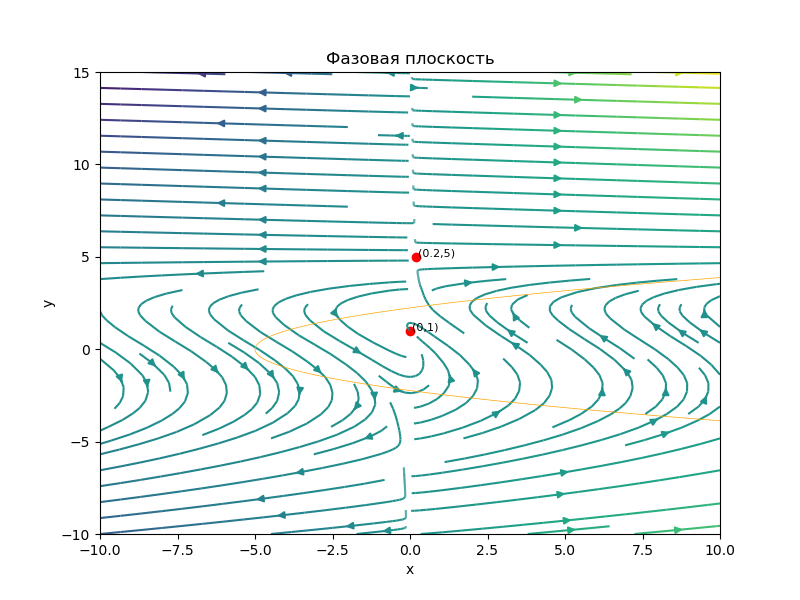

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))


top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')


q = ax.streamplot(X, Y, U, V, color=U, linewidth=1.5)

ax.plot(x_plot, y_plot, color="orange", linewidth=0.5, label="y^2 - x - b = 0")
ax.scatter([x1], [y1], color="red", linewidth=1)
ax.scatter([x2], [y2], color="red", linewidth=1)

plt.text(x1 + 0.07, y1, "({0},{1})".format(x1, y1), fontsize = 8)
plt.text(x2 + 0.07, y2, "({0},{1})".format(x2, y2), fontsize = 8)


plt.xlim(a1, b1)
plt.ylim(a2, b2)

ax.set_xlabel("x")
ax.set_ylabel("y")

plt.title("Фазовая плоскость")
plt.show()